In [ ]:
import sys
import numpy as np, matplotlib.pyplot as plt
import agama
import readgadget as rg 
sys.path.append('/home/guozx/soft/')
import glio 

In [10]:
from IPython.core.display import HTML

HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

In [9]:
npart0 = 0
npart1 = 200000
npart2 = 0
npart3 = 200000

agama.setUnits(mass=1e10, length=1, velocity=1)
model = agama.SelfConsistentModel(rminSph  = 0.01,
            rmaxSph        = 1000.,
            sizeRadialSph  = 50,
            lmaxAngularSph = 4)
para_halo = dict(type='Dehnen', mass=1e-4, scaleRadius=5, gamma = 1)
para_bulge = dict(type='King', mass=1e-4,W0=8,scaleRadius=0.02)
density_halo = agama.Density(**para_halo)
density_bulge = agama.Density(**para_bulge)
print(density_halo.totalMass(),density_bulge.totalMass())
model.components.append(agama.Component(density=density_bulge,       disklike=False))
model.components.append(agama.Component(density=density_halo,    disklike=False))
model.iterate()
df_halo = agama.DistributionFunction(type='QuasiSpherical',density=density_halo,potential=model.potential)
df_bulge = agama.DistributionFunction(type='QuasiSpherical',density=density_bulge,potential=model.potential)

print(df_halo.totalMass(),df_bulge.totalMass())

self_bulge = dict(rminSph        = 0.001,
                rmaxSph        = 40.,
                sizeRadialSph  = 60,
                lmaxAngularSph = 4)
self_halo = dict(rminSph        = 0.001,
                rmaxSph        = 100.,
                sizeRadialSph  = 60,
                lmaxAngularSph = 4) 
model.components[0]=agama.Component(df=df_bulge,disklike=False,**self_bulge)
model.components[1]=agama.Component(df=df_halo,disklike=False,**self_halo)
r=np.logspace(-4.,1.)
xyz=np.vstack((r,r*0,r*0)).T
for iteration in range(10):
    model.iterate()
    densBulge= model.components[0].density
    densHalo = model.components[1].density
    print(densBulge.totalMass(),densHalo.totalMass())
bulge = agama.GalaxyModel(potential=model.potential, df=df_bulge, af=model.af).sample(npart3)
halo = agama.GalaxyModel(potential=model.potential, df=df_halo, af=model.af).sample(npart1)

0.01 0.000999925406183771
Updating potential...done
Updating action finder...done
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
0.00999999589236863 0.0
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
0.0009993802533225452 0.010087098927749316
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
0.0009993807055206977 0.010087589024665089
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
0.0009993806334180953 0.010087595308899371
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
0.000999380797855553 0.010087593983918862
Computing density for component 0

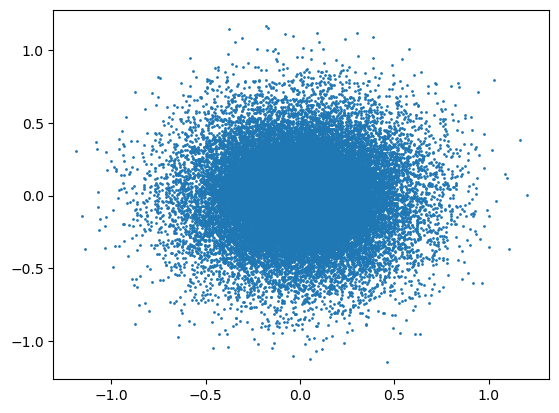

(array([6.0000e+00, 4.2000e+01, 1.7000e+02, 5.1900e+02, 1.3310e+03,
        2.8590e+03, 5.7640e+03, 1.0216e+04, 1.5239e+04, 1.8397e+04,
        1.7203e+04, 1.2963e+04, 7.8270e+03, 4.2380e+03, 1.9940e+03,
        7.9700e+02, 3.1100e+02, 9.9000e+01, 2.0000e+01, 5.0000e+00]),
 array([-28.90154088, -25.93944861, -22.97735633, -20.01526405,
        -17.05317178, -14.0910795 , -11.12898722,  -8.16689495,
         -5.20480267,  -2.24271039,   0.71938188,   3.68147416,
          6.64356644,   9.60565871,  12.56775099,  15.52984327,
         18.49193554,  21.45402782,  24.4161201 ,  27.37821237,
         30.34030465]),
 <BarContainer object of 20 artists>)

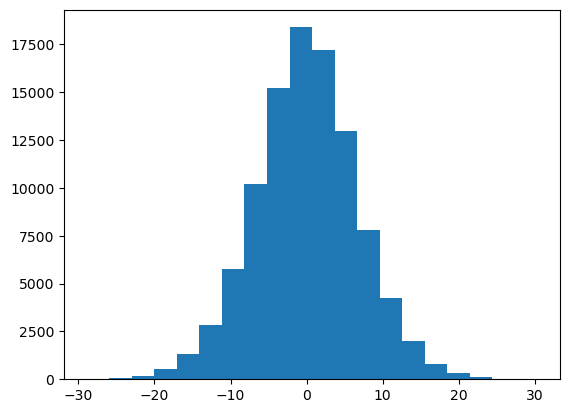

In [10]:
#print(halo[1])
plt.scatter(bulge[0][:,0],bulge[0][:,1],s=1)
plt.show()
plt.hist(bulge[0][:,4],bins=20)

In [11]:
s = glio.GadgetSnapshot(None)
s.header.npart = np.array([0, npart1, npart2, npart3, 0, 0]).astype('int')
s.header.num_files = np.array([1]).astype('int')

if npart1!=0:
        s.pos[1]  = halo[0][:,:3].astype('float32')
        s.vel[1]  = halo[0][:,3:].astype('float32')
        s.mass[1] = halo[1].astype('float32')
        s.ID[1]   = np.arange(npart1).astype('uint32') + npart0 +1


if npart3!=0:
    s.pos[3]  = bulge[0][:,:3].astype('float32')
    s.vel[3]  = bulge[0][:,3:].astype('float32')
    s.mass[3] = bulge[1].astype('float32')
    s.ID[3]   = np.arange(npart3).astype('uint32') + npart0 + npart1 + npart2 +1

print(s.mass[1],s.mass[3])
foutput = '/public4/home/sc57082/GC/ICs/cusp/ndm8.ini'
s.save(foutput)

[0.01016496] [9.96891e-09 9.96891e-09 9.96891e-09 ... 9.96891e-09 9.96891e-09
 9.96891e-09]


/public4/home/sc57082/local/glio/snapshot.py:86: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.array(values, dtype=dtype)


In [34]:
0.0032*1**0.5

0.0032

In [11]:
print(s.pos[3].shape)

(100000, 3)
